**Solve problems below, and download .ipynb file with “File>Download .ipynb” menu.**



*   The name of the ipynb file should be: Programming02_StudentID_Name.ipynb<br/>
ex) Programming02_20225432_YeongjinKoh.ipynb
*   Submission Deadline : 2024/04/10 11:59pm (23:59)



BlackBoard submission should be completed before the deadline. <br/>
If it's late less than 24 hours, you will get 50% of your score. If it's late more than 1 day, you will get 0% of your score.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Problem 1. Covariance and Correlation matrices

In [2]:
import numpy as np
import math
import scipy.stats as stats
import pandas as pd

## Problem 1-1

Import data_assignment2.csv as a Pandas DataFrame.

Make a covariance matrix of the following variables: age, height, weight

The (i,j) element of the covariance matrix should be the sample covariance of the i-th and j-th variable.

(Don't use np.cov() & pd.DataFrame.cov() functions nor any other built-in functions which compute covariances ! )

Hint: you can treat the pandas dataframe as numpy matrix. Just be careful with indexing. Use M.iloc[i,j] instead of M[i,j] when indexing.

In [3]:
# write code here (Try to use matrix operation. If you use matrix operation, the code is simple ! )
def get_covariance(M):
    n = len(M)
    identity_matrix = np.eye(n)
    ones_matrix = np.ones(n)
    return 1 / (n - 1) * M.T @ (identity_matrix - 1 / n * ones_matrix) @ M

data = pd.read_csv("data_assignment2.csv")
M = data[["age", "height", "weight"]]
cov_matrix = get_covariance(M)
cov_matrix

,age,height,weight
age,234.858227,-7.370054,-7.366025
height,-7.370054,82.061130,82.388529
weight,-7.366025,82.388529,84.815862


## Problem 1-2

Make a function which takes the a pandas dataframe as input and returns the correlation matrix of all the variables.

The (i,j) element of the correlation matrix should be the sample correlation of the i-th and j-th variable.

(The sample correlation of random variables $X$ and $Y$ is: $\frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2\sum_{i=1}^n(Y_i-\bar{Y})^2}}$ )

(Don't use np.cov(), np.corr(), pd.DataFrame.cov(), pd.DataFrame.corr() functions nor any other built-in functions which compute covariances and correlations!)

In [4]:
def correlation_matrix(dataframe):
    #write code here
    cov_matrix = get_covariance(dataframe)
    diag = np.diag(cov_matrix)
    diag = diag.reshape((1, len(diag)))
    variance_prod = diag.T @ diag
    return cov_matrix / np.sqrt(variance_prod)
    
    
correlation_matrix(data[["age","height","weight"]])

,age,height,weight
age,1.000000,-0.053088,-0.052191
height,-0.053088,1.000000,0.987551
weight,-0.052191,0.987551,1.000000


# Problem 2. Determinant





## Problem 2-1


Make a function named `matrix_determinant2' which takes a 2X2 matrix as input and calculates the determinant of the matrix. 


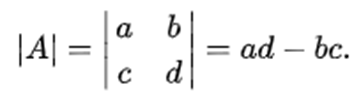



In [5]:
def matrix_determinant2( m ) :
    # write code here
    return m[0][0] * m[1][1] - m[0][1] * m[1][0]
    
    
p = np.array([[5,6],[4,2]])
d = matrix_determinant2( p )
print( "det(p): ", d )

det(p):  -14


## Problem 2-2

Make a function names 'matrix_determinant3' which takes a 3X3 matrix as input and calculates the determinant of the matrix. Hint: Use the 'matrix_determinant2' function.

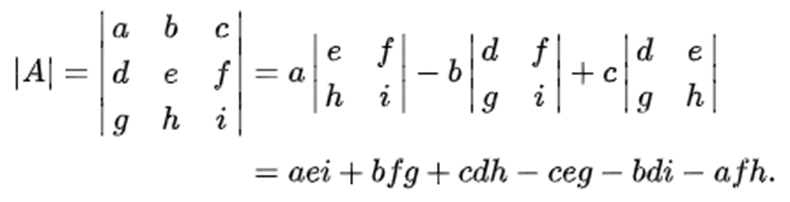






In [6]:
def matrix_determinant3( m ) :
    # write code here
    m00 = matrix_determinant2(np.delete(np.delete(m, 0, 0), 0, 1))
    m01 = matrix_determinant2(np.delete(np.delete(m, 0, 0), 1, 1))
    m02 = matrix_determinant2(np.delete(np.delete(m, 0, 0), 2, 1))
    return  m[0, 0] * m00 - m[0, 1] * m01 + m[0, 2] * m02
    
    
p = np.array([[2, 4, 6], [2, 4, 6], [8, 2, 7]])
d=matrix_determinant3(p)
print( "det(p): ", d, np.linalg.det( p ) )

det(p):  0 0.0


## Problem 2-3

Make a function names 'matrix_determinant4' which takes a 4X4 matrix as input and calculates the determinant of the matrix. 

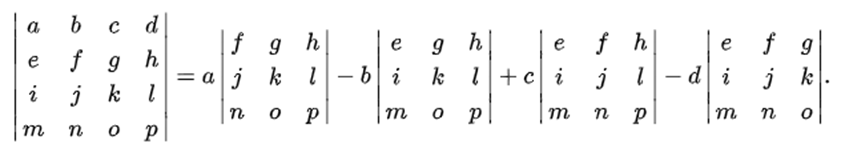

In [7]:
def matrix_determinant4( m ) :
    # write code here
    m00 = matrix_determinant3(np.delete(np.delete(m, 0, 0), 0, 1))
    m01 = matrix_determinant3(np.delete(np.delete(m, 0, 0), 1, 1))
    m02 = matrix_determinant3(np.delete(np.delete(m, 0, 0), 2, 1))
    m03 = matrix_determinant3(np.delete(np.delete(m, 0, 0), 3, 1))
    
    return m[0, 0] * m00 - m[0, 1] * m01 + m[0, 2] * m02 - m[0, 3] * m03
    
    
    
p = np.array([[1, 9, 8, 1], [8, 9, 2, 5], [9, 3, 5, 7], [5, 3, 1, 8]])
d = matrix_determinant4( p )
print( "det(p): ", d, np.linalg.det( p ) )

det(p):  -2823 -2823.0


## Problem 2-4

Generalize the idea and make a function that can calculate the determinant of a square matrix of 'any' size. (Hint: Use recursion.)


In [8]:
def matrix_determinant( m ) :
    #write code here
    if m.shape == (1, 1):
        return m[0, 0]
    
    cols = m.shape[1]
    determinant = 0
    for i in range(cols):
        smaller_m = np.delete(np.delete(m, 0, 0), i, 1)
        smaller_determinant = matrix_determinant(smaller_m)
        if i & 1:
            determinant -= m[0, i] * smaller_determinant
        else:
            determinant += m[0, i] * smaller_determinant
            
    return determinant
    

# DO not modify anything below    
np.random.seed(0)
    
p=np.random.rand(3,3)
d = matrix_determinant( p )
#print( "p: ", p )
print( "det(p): ", d, np.linalg.det( p ) )

p=np.random.rand(7,7)
d = matrix_determinant( p )
#print( "p: ", p )
print( "det(p): ", d, np.linalg.det( p ) )


det(p):  -0.08430330697685007 -0.08430330697685008
det(p):  0.023504261162136518 0.023504261162136577


## Problem 2-5 (Leading Principal Minor Test for Positive Definiteness)

A nxn real symmetric matrix $\mathbf{M} \in \mathbf{R}^{n \times n}$ is positive definite,<br/>
if $\mathbf{z^TMz} > 0$ for all non-zero vector $\mathbf{z}$.

We can check the positive definiteness of symmetric matrix by using **"Leading Principal Minor Test(Sylvester's Criterion)"**

(Source : http://www.princeton.edu/~aaa/Public/Teaching/ORF363_COS323/F14/ORF363_COS323_F14_Lec2.pdf, p11.)

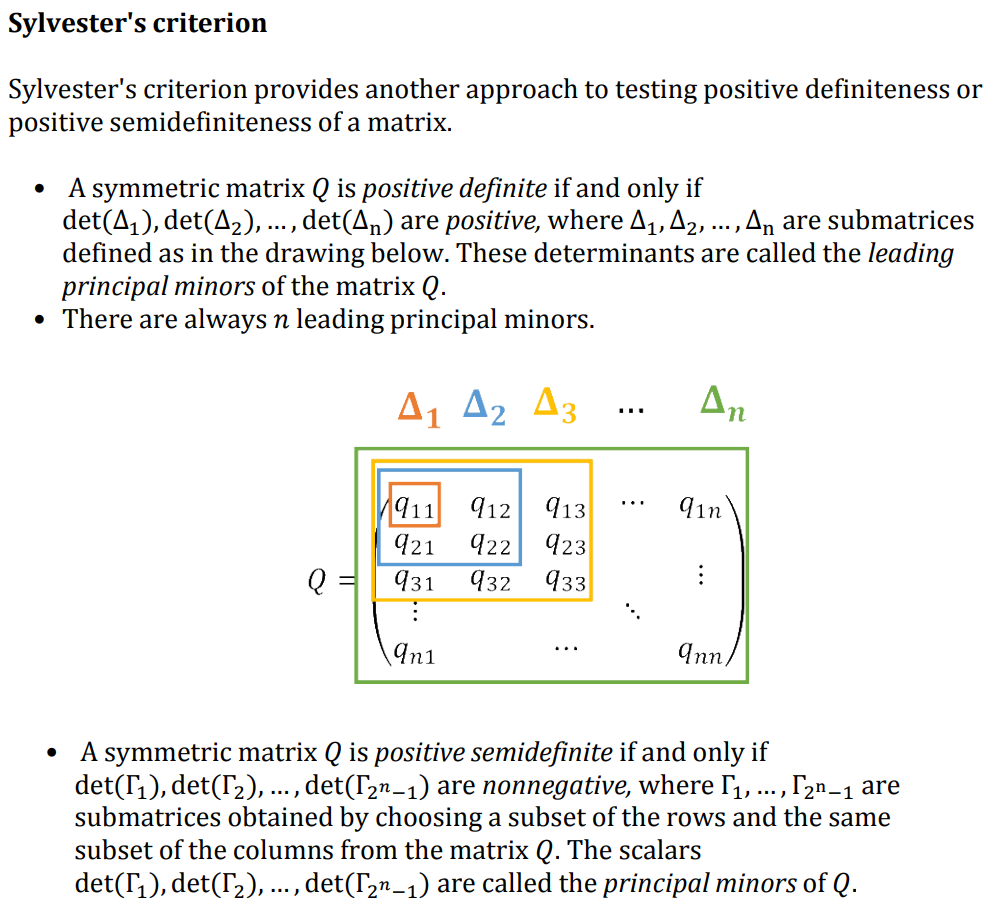

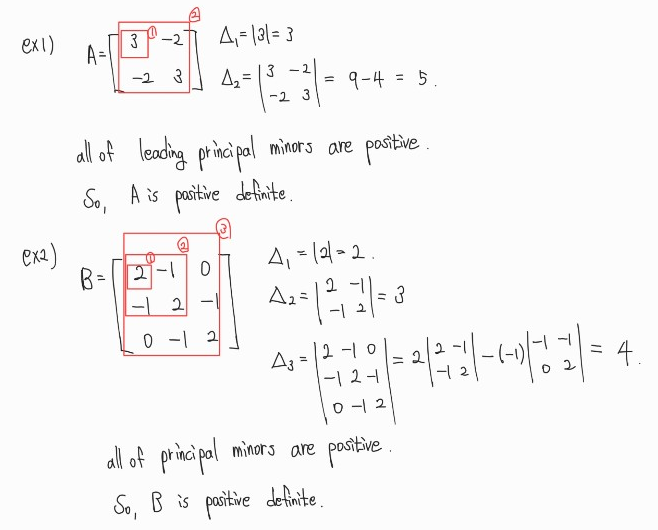

Using **"matrix_determinant"** function made in Problem 2-4, make a function named **"positive_definiteness"** which has input and output as follows.

<br/>
* Input : Symmetric square matrix. $\mathbf{A} \in \mathbf{R}^{n \times n}$ (numpy array)<br/>
* Output : 1) print all the leading prinicipal minors (determinant of submatrices)<br/>
2) True or False ($\mathbf{A}$ is positive definite or not.)

In [9]:
def positive_definiteness(A):

    #Write code here
    A = np.array(A)
    n = A.shape[0]
    is_positive_definite = True
    for i in range(n):
        leading_principal_minor = matrix_determinant(A[:i+1, :i+1])
        print("Leading Principal Minor", i + 1, "=", leading_principal_minor)
        is_positive_definite &= leading_principal_minor > 0
    return is_positive_definite
    

In [10]:
# Implementation example 1 of the 'positive_definiteness' function
# DO NOT MODIFY!!

A = np.array([[3, -2], [-2, 3]])
print(f"Is A is positive definite matrix ? {positive_definiteness(A)}")

Leading Principal Minor 1 = 3
Leading Principal Minor 2 = 5
Is A is positive definite matrix ? True


In [11]:
# Implementation example 2 of the 'positive_definiteness' function
# DO NOT MODIFY!

B = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
print(f"Is B is positive definite matrix ? {positive_definiteness(B)}")

Leading Principal Minor 1 = 2
Leading Principal Minor 2 = 3
Leading Principal Minor 3 = 4
Is B is positive definite matrix ? True


In [12]:
# Implementation example 3 of the 'positive_definiteness' function
# DO NOT MODIFY!

from sklearn.datasets import make_spd_matrix

C = make_spd_matrix(5, random_state = 42)
C = list(C)
print(f"Is C is positive definite matrix ? {positive_definiteness(C)}")

Leading Principal Minor 1 = 0.977666147300414
Leading Principal Minor 2 = 0.5748054315773021
Leading Principal Minor 3 = 0.27649677671755046
Leading Principal Minor 4 = 0.14515826283671712
Leading Principal Minor 5 = 0.07197507714349377
Is C is positive definite matrix ? True


In [13]:
# Implementation example 4 of the 'positive_definiteness' function
# DO NOT MODIFY!

D = np.array([[3, 0, 0], [0, 4, 0], [0, 0, -5]])
print(f"Is D is positive definite matrix ? {positive_definiteness(D)}")

Leading Principal Minor 1 = 3
Leading Principal Minor 2 = 12
Leading Principal Minor 3 = -60
Is D is positive definite matrix ? False


# Problem 3. Simple Linear Regression


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 3-1.

Implement the code below

1) import the data_assignment2.csv file (dataframe) <br/>
2) plot the scatter plot of height(x-axis) and weight(y-axis). <br/>
* set the x-axis name as "height(cm)", y-axis name as "weight(kg)"<br/>
x : height(cm)<br/>
y : weight(kg)<br/>

In [15]:
# write code here
data = pd.read_csv("data_assignment2.csv")


######################################
data.head(5)

,Unnamed: 0,gender,age,height,weight,marital_status,education,income
0,0,0,30,158.635601,47.999269,not married,high,1
1,1,0,60,156.594756,45.777660,married,elementary,1
2,2,1,50,172.702880,62.653023,married,univ,1
3,3,0,50,154.178600,43.887703,married,high,2
4,4,1,40,178.385816,66.239314,married,middle,1


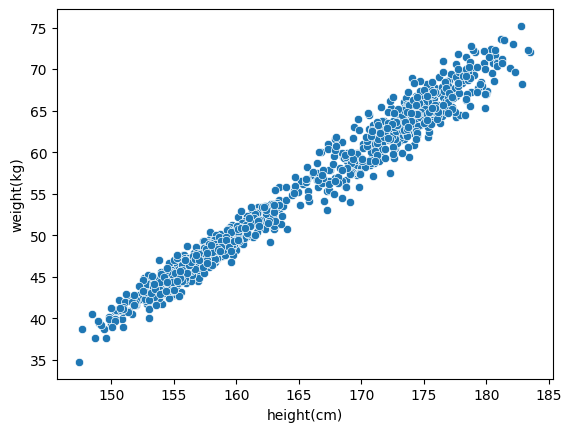

In [16]:
# write code here
plot_data = data[["height", "weight"]]
ax = sns.scatterplot(plot_data, x="height", y="weight")
ax.set_xlabel("height(cm)")
ax.set_ylabel("weight(kg)")
plt.show()

## Problem 3-2

Calculate the sample correlation between 'height' and 'weight'. Use the correlation_matrix() function that you made in Problem 1-2.

In [17]:
# write code here
corr_matrix = correlation_matrix(plot_data)
corr = corr_matrix["height"]["weight"]

###############################################################
print(f'correlation between height and weight is {corr:.4f}')

correlation between height and weight is 0.9876


## Problem 3-3

Assume the following model

$y_i = \beta_0 + \beta_1x_i + ϵ_i$<br/>
 where $y$ is the weight and $x$ is the height and $\epsilon_i$'s are i.i.d with mean 0. <br/><br/>

Calculate  the least-squares estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ and print them.


In [18]:
X = data['height']
y = data['weight']


#Write code here
X_mean = np.mean(X)
y_mean = np.mean(y)

S_xy = np.sum((X - X_mean) * y)
S_xx = np.dot(X - X_mean, X - X_mean)

beta_1 = S_xy / S_xx
beta_0 = y_mean - beta_1 * X_mean

################################################################
print(f'beta1_hat is {beta_1:.3f}')
print(f'beta0_hat is {beta_0:.3f}')

beta1_hat is 1.004
beta0_hat is -110.635


In [19]:
# The following code compares your result with the result of a built-in function.
# DO NOT MODIFY!!
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[["height"]], data["weight"])
print(f'beta0_hat: {lr.intercept_:.3f}, beta1_hat: {lr.coef_[0]:.3f}')

beta0_hat: -110.635, beta1_hat: 1.004


## Problem 3-4

Calculate vector $\hat{y}=[\hat{y}_1, \cdots, \hat{y}_N]^T$ where $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i$,<br/>

and then, calculate SST, SSE, SSR and $R^2$.



In [20]:
# Write code here
y_hat = beta_0 + beta_1 * X
SST = np.sum(np.square(y - y_mean))
SSE = np.sum(np.square(y - y_hat))
SSR = np.sum(np.square(y_hat - y_mean))
R2 = SSR / SSE

#####################################################################
print(f'Total Sum of Sqaures, SST : {SST:.3f}')
print(f'Residual Sum of Sqaures, SSE : {SSE:.3f}')
print(f'Regression sum of Sqaures, SSR : {SSR:.3f}')
print(f'SST vs SSE+SSR : {SST:.3f} = {SSE+SSR:.3f}')
print(f'Coefficient of Determination, R2 : {R2:.3f}')
print(f'correlation^2 vs R2 : {corr**2:.3f} = {R2:.3f}')

Total Sum of Sqaures, SST : 84391.783
Residual Sum of Sqaures, SSE : 2088.136
Regression sum of Sqaures, SSR : 82303.647
SST vs SSE+SSR : 84391.783 = 84391.783
Coefficient of Determination, R2 : 39.415
correlation^2 vs R2 : 0.975 = 39.415


## Problem 3-5

**Plot the Regression line** and scatter plot of data following the instruction below.

* Set the figure size to (10,6)
* You can plot the regression line using X and y_hat from above
* Set the x-axis name as "height(cm)", y-axis name as "weight(kg)", fontsize to 12
* Set the title of figure as "Linear Regression Line", fontsize to 18.
* Set the scatter's color to red.
* Set the scatter's size to 1.5.
* Set the regression line's color to blue.
* Set the regression line's width to 5.
* Set the regression line label name as $y = \hat{\beta}_0 + \hat{\beta}_1x$ (use the calculated value of problem 3-4)
* Set the legend.
* Set the grid.



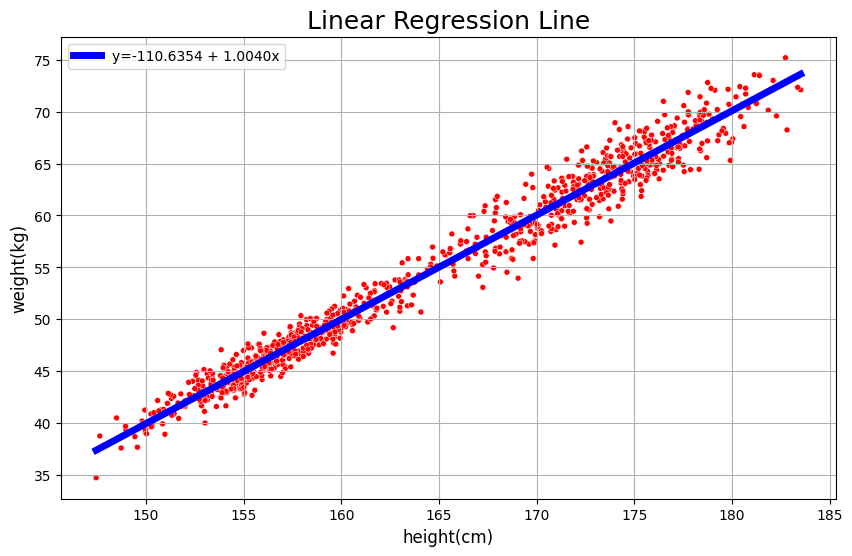

In [21]:
#Write code here
plt.figure(figsize=(10, 6))
regression_line = pd.DataFrame({ "height": X, "weight": y_hat })
ax = sns.lineplot(regression_line, x="height", y="weight", color="blue", linewidth=5, label=f"y={beta_0:.4f} + {beta_1:.4f}x")
ax = sns.scatterplot(plot_data, x="height", y="weight", color="red", size=1.5, legend=None, ax=ax)
ax.set_title("Linear Regression Line", fontsize=18)
ax.set_xlabel("height(cm)", fontsize=12)
ax.set_ylabel("weight(kg)", fontsize=12)
ax.grid()
plt.show()

## Problem 3-6

In Problem 3, we are assuming the following model:

 $y_i = \beta_0 + \beta_1x_i + ϵ_i$<br/>
 where $y$ is the weight (in kg) and $x$ is the height(in cm) and $\epsilon_i$'s are i.i.d with mean 0. <br/><br/>

 Consider the following, slightly different model<br/>

$y_i = \alpha_0 + \alpha_1\tilde{x}_i + \epsilon_i$,<br/>
where $\tilde{x}$ is the height( in meters)


Suppose $\hat{\beta}$ and $\hat{\alpha}$ are least-squares estimates. **Show that $\hat{\alpha}_1 = 100\hat{\beta}_1$ by Python Code.**






1) Create new column height(m)


In [22]:
# Write code here

data["height(m)"] = data["height"] / 100

#####################################

data.head(5)

,Unnamed: 0,gender,age,height,weight,marital_status,education,income,height(m)
0,0,0,30,158.635601,47.999269,not married,high,1,1.586356
1,1,0,60,156.594756,45.777660,married,elementary,1,1.565948
2,2,1,50,172.702880,62.653023,married,univ,1,1.727029
3,3,0,50,154.178600,43.887703,married,high,2,1.541786
4,4,1,40,178.385816,66.239314,married,middle,1,1.783858


2) Calculate the least-squares estimates of $\alpha_0$ and $\alpha_1$.

In [23]:
# Write code here
X = data['height(m)']
y = data['weight']

X_mean = np.mean(X)
y_mean = np.mean(y)

S_xy = np.sum((X - X_mean) * y)
S_xx = np.dot(X - X_mean, X - X_mean)

alpha_1 = S_xy / S_xx
alpha_0 = y_mean - alpha_1 * X_mean

#####################################################################
print(f'alpha1_hat is {alpha_1:.4f}')
print(f'It is {round(alpha_1/beta_1)} times of beta1_hat ({beta_1:.4f}).')

alpha1_hat is 100.3990
It is 100 times of beta1_hat (1.0040).


# Problem 4. Matrix Decomposition



## Problem 4-1. Backward-Substitution

Let $U$ be square and upper-triangular matrix and $x$ and $v$ be vectors.

Solution of $Ux=v$:

$x_i=\frac{v_i-\sum_{j=i+1}^{n}u_{ij}x_{j}}{u_{ii}}~~~(i=n,n-1,\cdots,1)$

Implement a function which takes $U$ and $v$ as inputs and returns the solution $x$ as output.

In [24]:
def back_substitution(U,v):
    # Write code here!
    n = len(v)
    x = np.zeros(n)
    x[-1] = v[-1] / U[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (v[i] - np.dot(U[i, :], x)) / U[i, i]
    return x

In [25]:
# Do not modify
back_substitution(np.array([[2, -4, 2], [0, -1, 3], [0, 0, 16]]), np.array([6, 8, 48]))

array([2., 1., 3.])

## Problem 4-2. Forward-Substitution

Let  $L$  be square and lower-triangular matrix and  $x$  and  $v$  be vectors.

Implement a function which takes  $L$  and  $v$  as inputs and returns the solution of  $Lx=v$  as output.

In [26]:
def forward_substitution(L,v):

    # Write code here!
    n = len(v)
    x = np.zeros(n)
    x[0] = v[0] / L[0, 0]
    for i in range(1, n):
        x[i] = (v[i] - np.dot(L[i, :], x)) / L[i, i]
    return x   
    

In [27]:
# do not modify
forward_substitution(np.array([[16, 0, 0], [3, -1, 0], [2, -4, 2]]),np.array([48, 8, 6]))

array([3., 1., 2.])

## Problem 4-3. Cholesky Decomposition.

In Problem 4-3, **You should not use the scipy.linalg, numpy.linalg method.**

Make the **cholesky** function that performs the Cholesky Decomposition of a square, symmetric and positive definite matrix A

* Input : Square, symmetric and positive definite matrix A
* output : Lower triangular matrix L

In [28]:
def cholesky(A):

    #write code here!
    n = A.shape[0]
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sum_k = np.dot(L[i, :j], L[j, :j])
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - sum_k)
            elif i > j:
                L[i, j] = (A[i, j] - sum_k) / L[j, j]
    return L

In [29]:
# do not modify

A = np.array([[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]])
cholesky(A)

array([[ 2.44948974,  0.        ,  0.        ,  0.        ],
       [ 1.22474487,  2.12132034,  0.        ,  0.        ],
       [ 1.63299316,  1.41421356,  2.30940108,  0.        ],
       [ 3.26598632, -1.41421356,  1.58771324,  3.13249102]])

## Problem 4-4. Multiple Linear Regression 

Use the data that you imported in Problem 3 for this problem. 

Assume the following model

$y_i = \beta_0 + \beta_1x_{1i}+ \beta_2x_{2i} + ϵ_i$<br/>
 where $y$ is the weight, $x_1$ is the height, $x_2$ is the gender and $\epsilon_i$'s are i.i.d with mean 0. <br/><br/>

Calculate  the least-squares estimates $\hat{\beta}_0$, $\hat{\beta}_1$ and $\hat{\beta}_2$ using the functions made in Problem 4.1-4.3 and print them. (Do not use any built-in function that computes the inverse of a matrix.)


In [30]:
# do not modify this cell
X=data[['height','gender']]
X.insert(loc=0, column='intercept', value=1)
print(X.head())
X=np.array(X)

   intercept      height  gender
0          1  158.635601       0
1          1  156.594756       0
2          1  172.702880       1
3          1  154.178600       0
4          1  178.385816       1


In [31]:
#Write code here
XTX = X.T @ X
XTY = X.T @ y
L = cholesky(XTX)
gamma = forward_substitution(L, XTY)
beta = back_substitution(L.T, gamma)

print(beta)

[-1.10570908e+02  1.00357389e+00  8.31569305e-03]


In [32]:
# The following code compares your result with the result of a built-in function.
# DO NOT MODIFY!!
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[["height","gender"]], data["weight"])
print(f'beta0_hat: {lr.intercept_:.8f}, beta1_hat: {lr.coef_[0]:.8f}, beta2_hat: {lr.coef_[1]:.8f}')

beta0_hat: -110.57090810, beta1_hat: 1.00357389, beta2_hat: 0.00831569
